In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")  # Suppress warnings


In [5]:
import pandas as pd

# Load Tour.csv into Tour_data
Tour_data = pd.read_csv('Tour.csv', delimiter=',')

# Display the first few rows of the dataset to verify
Tour_data.head

<bound method NDFrame.head of         Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0                        Yes  
1                         No  
2                        Yes  
3                

In [6]:
# Separate features (X) and target (Y)
X = Tour_data.drop(columns='Accommodation_Available', axis=1)  # Features: All columns except 'Accommodation_Available'
Y = Tour_data['Accommodation_Available']                      # Target: The 'Accommodation_Available' column


In [7]:
# Splitting the Tour_data dataset
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, stratify=Y, random_state=45
)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'Accommodation_Available' is the target variable
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert non-numeric Y if needed
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = linear_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 0.26443974228380956
R-squared Score: -0.05799781412994176


In [16]:
input_data_str = ['62', '0', '0', '140', '268', '0', '0', '160', '0', '3.6', '0', '2', '2']  # Example data
input_data = np.array(input_data_str, dtype=float).reshape(1, -1)

# Create a DataFrame with the same columns as X_train
input_df = pd.DataFrame(columns=X_train.columns)  # Empty DataFrame with X_train's structure
input_df.loc[0] = 0  # Initialize with zeros
input_df.iloc[0, :len(input_data[0])] = input_data[0]  # Fill in the provided data

# Make prediction
prediction = linear_model.predict(input_df)

# Convert prediction to binary and print result
if prediction[0] >= 0.5:
    print("Accommodation is Available (Yes)")
else:
    print("Accommodation is Not Available (No)")


Accommodation is Not Available (No)


In [20]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming 'Accommodation_Available' is the target variable
X = Tour_data.drop(columns=['Accommodation_Available'], axis=1)
Y = Tour_data['Accommodation_Available']

# Convert non-numeric Y if needed
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Saving the trained model using pickle
filename = 'tour_data_model.sav'
pickle.dump(linear_model, open(filename, 'wb'))

# Loading the saved model
loaded_model = pickle.load(open('tour_data_model.sav', 'rb'))

# Predict and evaluate with the loaded model
Y_pred = loaded_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Printing Mean Squared Error and R-squared Score
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Printing the names of all columns in the feature set (X)
for column in X.columns:
    print(column)


Mean Squared Error: 0.26443974228380956
R-squared Score: -0.05799781412994176
Location
Country
Category
Visitors
Rating
Revenue


In [26]:
def test_scalability(data, sizes=[500, 1000, 5000, 10000, 20000]):
    # Get the size of the dataset
    max_size = len(data)
    
    # Adjust sizes if necessary to avoid sampling more rows than available
    sizes = [size for size in sizes if size <= max_size]
    
    for size in sizes:
        subset_data = data.sample(n=size, random_state=42)
        X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
        Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
        
        # Split the data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Measure time and memory usage
        start_time = time.time()
        start_memory = memory_usage()

        # Initialize and train the model
        model = LinearRegression()
        model.fit(X_train, Y_train)
        training_time = time.time() - start_time
        
        # Measure memory usage during training
        memory_used = memory_usage() - start_memory
        
        # Predict and measure prediction time
        start_time = time.time()
        Y_pred = model.predict(X_test)
        prediction_time = time.time() - start_time
        
        # Evaluate model performance
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)
        
        print(f"Data Size: {size}")
        print(f"Training Time: {training_time:.4f} seconds")
        print(f"Prediction Time: {prediction_time:.4f} seconds")
        print(f"Memory Usage: {memory_used:.2f} MB")
        print(f"Mean Squared Error: {mse:.4f}")
        print(f"R-squared Score: {r2:.4f}")
        print("-" * 50)

# Run the test with different data sizes
test_scalability(Tour_data)


Data Size: 500
Training Time: 0.1246 seconds
Prediction Time: 0.0080 seconds
Memory Usage: 0.00 MB
Mean Squared Error: 0.2586
R-squared Score: -0.0382
--------------------------------------------------
Data Size: 1000
Training Time: 0.3344 seconds
Prediction Time: 0.0104 seconds
Memory Usage: 0.01 MB
Mean Squared Error: 0.2601
R-squared Score: -0.0429
--------------------------------------------------
Data Size: 5000
Training Time: 39.7031 seconds
Prediction Time: 0.0907 seconds
Memory Usage: 0.00 MB
Mean Squared Error: 0.2681
R-squared Score: -0.0796
--------------------------------------------------


In [27]:
from sklearn.metrics import precision_score

# Binary threshold for precision
threshold = 0.5
Y_pred_binary = (Y_pred > threshold).astype(int)
precision = precision_score(Y_test, Y_pred_binary)
print(f"Precision: {precision:.4f}")


Precision: 0.4956


In [40]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv('Tour.csv')

# Verify column names to ensure the correct target column name
print("Dataset Columns:", dataset.columns)

# Assuming 'Accommodation_Available' is the target variable
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
y = dataset['Accommodation_Available']

# Convert non-numeric Y if needed (if it's categorical like 'Yes'/'No')
y = y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target
print("Unique values in 'Accommodation_Available' after mapping:", y.unique())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test to numerical (dummy variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Unique values in 'Accommodation_Available' after mapping: [1 0]
Mean Squared Error: 0.26443974228380956
R-squared Score: -0.05799781412994176


In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset = pd.read_csv('Tour.csv')

# Verify column names to ensure the correct target column name
print("Dataset Columns:", dataset.columns)

# Assuming 'Accommodation_Available' is the target variable
X = dataset.drop(columns=['Accommodation_Available'], axis=1)
Y = dataset['Accommodation_Available']

# Convert non-numeric Y if needed (if it's categorical like 'Yes'/'No')
Y = Y.map({'Yes': 1, 'No': 0})  # Example mapping for binary target

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Convert categorical columns in X_train/X_test to numerical (dummy variables)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns in X_test to match X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = linear_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# -------------------------
# Fairness Analysis
# -------------------------
# Group-wise evaluation based on 'Country' (example)
if 'Country' in dataset.columns:
    groups = dataset['Country'].unique()
    print("\nFairness Analysis by 'Country':")
    for group in groups:
        group_data = dataset[dataset['Country'] == group]
        if not group_data.empty:
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)
            Y_group = group_data['Accommodation_Available']
            Y_group = Y_group.map({'Yes': 1, 'No': 0})  # Convert to numeric
            
            # Convert categorical data to dummies
            X_group = pd.get_dummies(X_group, drop_first=True)
            
            # Align columns to match training data
            X_group = X_group.reindex(columns=X_train.columns, fill_value=0)
            
            # Predict for this group
            Y_group_pred = linear_model.predict(X_group)
            
            # Evaluate
            group_mse = mean_squared_error(Y_group, Y_group_pred)
            group_r2 = r2_score(Y_group, Y_group_pred)
            
            print(f"Country: {group}")
            print(f"  Group Mean Squared Error: {group_mse}")
            print(f"  Group R-squared Score: {group_r2}")
else:
    print("No 'Country' column found for fairness analysis.")


Dataset Columns: Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')
Mean Squared Error: 0.26443974228380956
R-squared Score: -0.05799781412994176

Fairness Analysis by 'Country':
Country: India
  Group Mean Squared Error: 0.11900963699263477
  Group R-squared Score: 0.5239590801737938
Country: USA
  Group Mean Squared Error: 0.12608388930809444
  Group R-squared Score: 0.4941760300757728
Country: Brazil
  Group Mean Squared Error: 0.1297844474332994
  Group R-squared Score: 0.4799069372944862
Country: France
  Group Mean Squared Error: 0.12136831270531889
  Group R-squared Score: 0.5145102235324076
Country: Egypt
  Group Mean Squared Error: 0.11528166026155288
  Group R-squared Score: 0.5388711413057684
Country: China
  Group Mean Squared Error: 0.10681793623260594
  Group R-squared Score: 0.572465009196008
Country: Australia
  Group Mean Squared Error: 0.05992880323376195
  Group R-squared Score: 0.760145

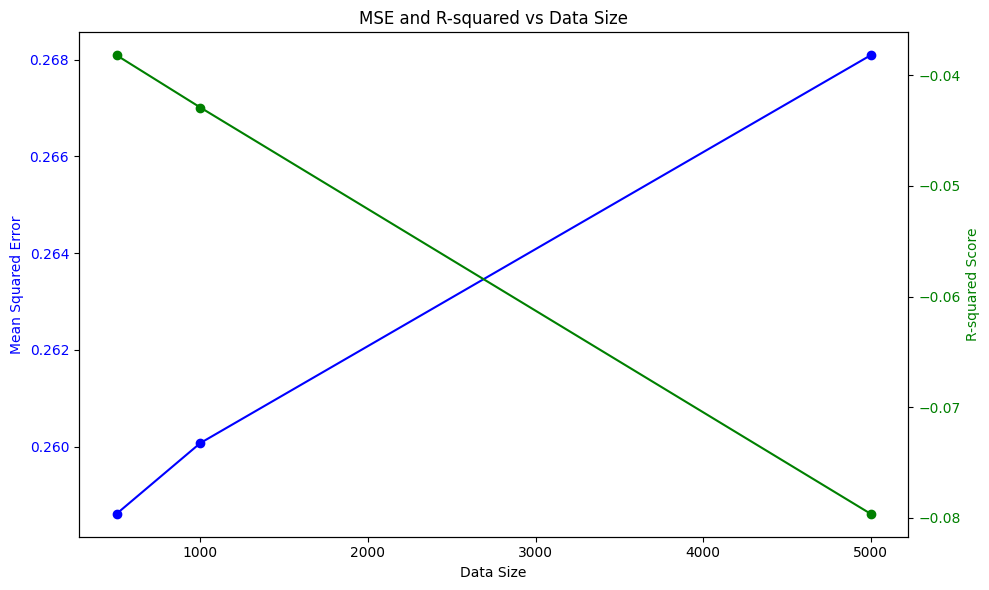

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming the dataset is already loaded in 'Tour_data'
# Verify the data's size
data_size = len(Tour_data)

# Define sample sizes based on the available data
data_sizes = [500, 1000, 5000, 10000, 20000]
data_sizes = [size for size in data_sizes if size <= data_size]  # Adjust if size exceeds data

# Function to plot accuracy metrics (MSE and R2)
def plot_accuracy_metrics(subset_data):
    X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
    Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
    X_train = pd.get_dummies(X_train, drop_first=True)
    X_test = pd.get_dummies(X_test, drop_first=True)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Initialize and train the Linear Regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train, Y_train)
    
    # Predict and evaluate
    Y_pred = linear_model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    return mse, r2

# Lists to store values for plotting
mse_values = []
r2_values = []

# Loop through different data sizes and collect MSE and R2 values
for size in data_sizes:
    subset_data = Tour_data.sample(n=size, random_state=42)  # Sample data
    mse, r2 = plot_accuracy_metrics(subset_data)
    mse_values.append(mse)
    r2_values.append(r2)

# Plot both metrics on a single graph with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot MSE on the left y-axis
ax1.set_xlabel('Data Size')
ax1.set_ylabel('Mean Squared Error', color='b')
ax1.plot(data_sizes, mse_values, marker='o', color='b', label='Mean Squared Error')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for R-squared
ax2 = ax1.twinx()
ax2.set_ylabel('R-squared Score', color='g')
ax2.plot(data_sizes, r2_values, marker='o', color='g', label='R-squared Score')
ax2.tick_params(axis='y', labelcolor='g')

# Add a title and show the plot
plt.title('MSE and R-squared vs Data Size')
fig.tight_layout()
plt.show()


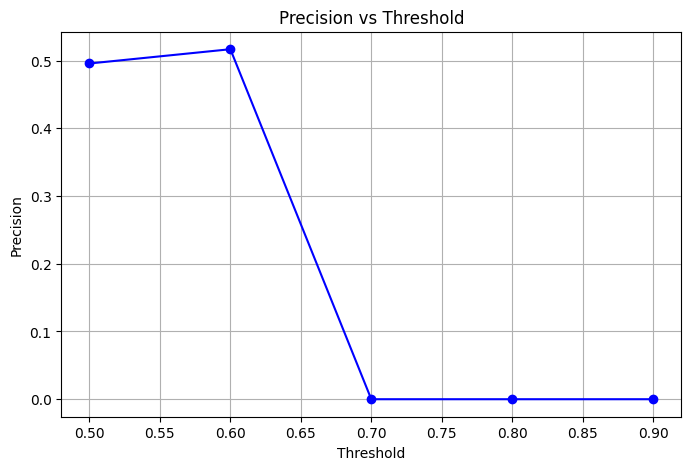

In [51]:
from sklearn.metrics import precision_score

# Function to calculate precision at different thresholds
def plot_precision(Y_test, Y_pred):
    thresholds = [0.5, 0.6, 0.7, 0.8, 0.9]
    precisions = []
    
    for threshold in thresholds:
        Y_pred_binary = (Y_pred > threshold).astype(int)
        precision = precision_score(Y_test, Y_pred_binary)
        precisions.append(precision)
    
    # Plot Precision vs Threshold
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, precisions, marker='o', linestyle='-', color='b')
    plt.title('Precision vs Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.show()

# Assuming 'Y_pred' and 'Y_test' are already defined (from previous steps)
plot_precision(Y_test, Y_pred)


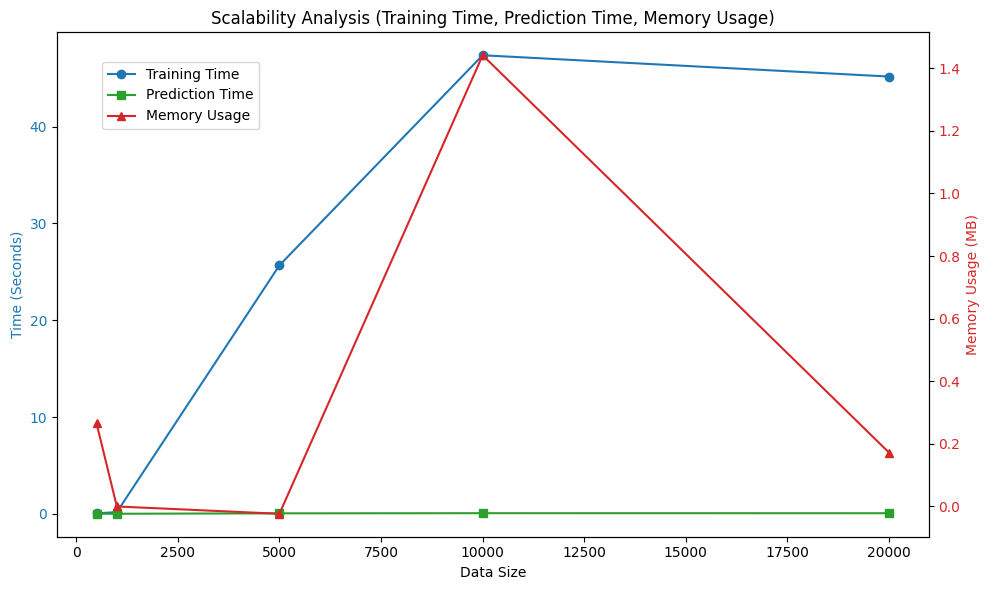

In [3]:
import time
import psutil
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Function to track memory usage
def memory_usage_psutil():
    process = psutil.Process()
    return process.memory_info().rss / 1024 ** 2  # in MB

# Function to test scalability with an adjustment to sample sizes
def test_scalability(data, sizes=[500, 1000, 5000, 10000, 20000]):
    # Lists to store performance metrics
    train_times = []
    pred_times = []
    memory_usage_list = []
    
    # Check the size of the data
    data_size = len(data)
    
    for size in sizes:
        # Adjust the sample size if it exceeds the data size
        sample_size = min(size, data_size)
        
        subset_data = data.sample(n=sample_size, random_state=42)
        X = subset_data.drop(columns=['Accommodation_Available'], axis=1)
        Y = subset_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
        
        # Split the data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Measure time and memory usage
        start_time = time.time()
        start_memory = memory_usage_psutil()

        # Initialize and train the model
        model = LinearRegression()
        model.fit(X_train, Y_train)
        training_time = time.time() - start_time
        
        # Measure memory usage during training
        memory_used = memory_usage_psutil() - start_memory
        
        # Predict and measure prediction time
        start_time = time.time()
        Y_pred = model.predict(X_test)
        prediction_time = time.time() - start_time
        
        train_times.append(training_time)
        pred_times.append(prediction_time)
        memory_usage_list.append(memory_used)

    # Plot the results
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot training time and prediction time
    ax1.set_xlabel('Data Size')
    ax1.set_ylabel('Time (Seconds)', color='tab:blue')
    ax1.plot(sizes, train_times, label='Training Time', color='tab:blue', marker='o')
    ax1.plot(sizes, pred_times, label='Prediction Time', color='tab:green', marker='s')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Create a second y-axis to plot memory usage
    ax2 = ax1.twinx()
    ax2.set_ylabel('Memory Usage (MB)', color='tab:red')
    ax2.plot(sizes, memory_usage_list, label='Memory Usage', color='tab:red', marker='^')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Add titles and legends
    ax1.set_title('Scalability Analysis (Training Time, Prediction Time, Memory Usage)')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

    plt.show()

# Test scalability with data sizes
test_scalability(Tour_data)


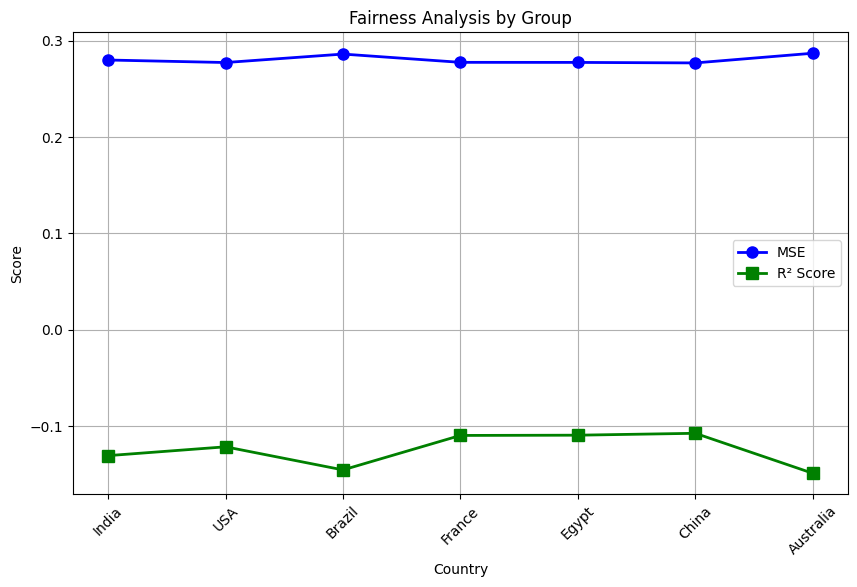

In [7]:
def plot_fairness_by_group(data, group_column='Country'):
    mse_groupwise = []
    r2_groupwise = []
    
    if group_column in data.columns:
        groups = data[group_column].unique()
        for group in groups:
            group_data = data[data[group_column] == group]
            X_group = group_data.drop(columns=['Accommodation_Available'], axis=1)
            Y_group = group_data['Accommodation_Available'].map({'Yes': 1, 'No': 0})
            
            # Split data
            X_train, X_test, Y_train, Y_test = train_test_split(X_group, Y_group, test_size=0.2, random_state=42)
            X_train = pd.get_dummies(X_train, drop_first=True)
            X_test = pd.get_dummies(X_test, drop_first=True)
            X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
            
            # Train and predict
            model = LinearRegression()
            model.fit(X_train, Y_train)
            Y_pred = model.predict(X_test)
            
            # Calculate MSE and R² Score
            mse = mean_squared_error(Y_test, Y_pred)
            r2 = r2_score(Y_test, Y_pred)
            
            mse_groupwise.append(mse)
            r2_groupwise.append(r2)

        # Plot fairness metrics (MSE and R² per group) as line plots
        plt.figure(figsize=(10, 6))
        plt.plot(groups, mse_groupwise, label='MSE', marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)
        plt.plot(groups, r2_groupwise, label='R² Score', marker='s', color='green', linestyle='-', linewidth=2, markersize=8)
        
        plt.xlabel(group_column)
        plt.ylabel('Score')
        plt.title('Fairness Analysis by Group')
        plt.legend()
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()
    else:
        print(f"Column '{group_column}' not found in data.")

# Run fairness analysis by 'Country' column
plot_fairness_by_group(Tour_data)


Run 1/10
Run 1 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049
Run 2/10
Run 2 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049
Run 3/10
Run 3 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049
Run 4/10
Run 4 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049
Run 5/10
Run 5 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049
Run 6/10
Run 6 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049
Run 7/10
Run 7 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049
Run 8/10
Run 8 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049
Run 9/10
Run 9 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049
Run 10/10
Run 10 completed - MSE: 0.2663126136205929, R²: -0.06575243792726049


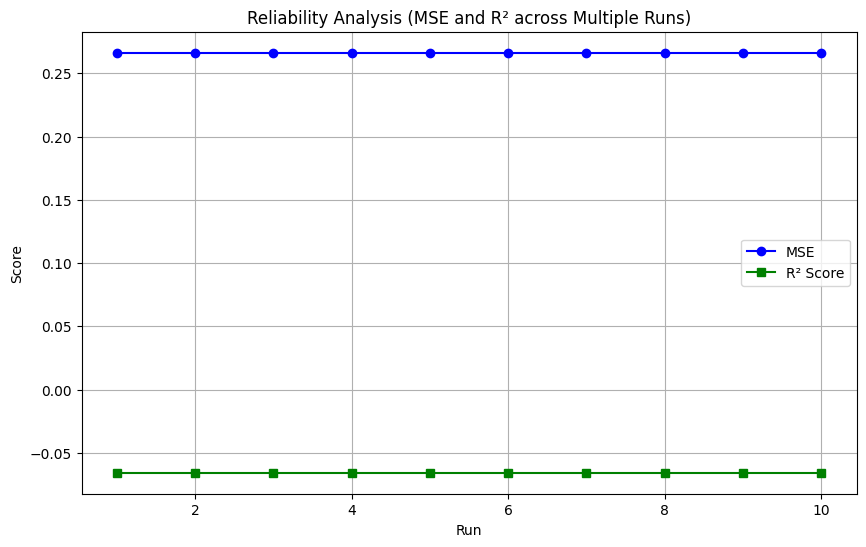

In [10]:
# Function to check model reliability over multiple runs
def plot_reliability(data, num_runs=10):
    mse_scores = []
    r2_scores = []
    
    for run in range(num_runs):
        print(f"Run {run + 1}/{num_runs}")  # Print which run is being processed
        X = data.drop(columns=['Accommodation_Available'], axis=1)
        Y = data['Accommodation_Available'].map({'Yes': 1, 'No': 0})

        # Split data into training and test sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        
        X_train = pd.get_dummies(X_train, drop_first=True)
        X_test = pd.get_dummies(X_test, drop_first=True)
        X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
        
        # Initialize and train the model
        model = LinearRegression()
        model.fit(X_train, Y_train)

        # Predict and evaluate
        Y_pred = model.predict(X_test)
        
        mse = mean_squared_error(Y_test, Y_pred)
        r2 = r2_score(Y_test, Y_pred)
        
        mse_scores.append(mse)
        r2_scores.append(r2)
        print(f"Run {run + 1} completed - MSE: {mse}, R²: {r2}")  # Print the scores of each run

    # Plot MSE and R² Scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_runs + 1), mse_scores, label='MSE', marker='o', color='blue')
    plt.plot(range(1, num_runs + 1), r2_scores, label='R² Score', marker='s', color='green')
    plt.xlabel('Run')
    plt.ylabel('Score')
    plt.title('Reliability Analysis (MSE and R² across Multiple Runs)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Run reliability analysis on the data
plot_reliability(Tour_data)
